# Practice Questions - K-Means Clustering

## 1. Cluster Visualization on Synthetic Data
- Use `make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)`.
- Apply K-Means clustering with `n_clusters=4`.
- Visualize the clusters with scatter plots.

Main data (X):
 [[ -9.1139443    6.81361629]
 [ -9.35457578   7.09278959]
 [ -2.01567068   8.28177994]
 [ -7.01023591  -6.22084348]
 [-10.06120248   6.71867113]
 [ -6.36503142  -6.97607271]
 [  4.74378739   2.20436011]
 [ -6.63186832  -7.21834432]
 [ -2.79670217   8.90289074]
 [  3.92509674   2.36710185]
 [ -2.87022159  10.12565304]
 [  4.85408813   1.55742393]
 [ -2.38387947   7.83848405]
 [ -3.35842007   8.76189893]
 [ -9.2287133    7.03124769]
 [ -2.93042948   8.81768884]
 [ -9.81485322   7.35237388]
 [  3.42479328   2.08504227]
 [ -2.45095109   9.59547312]
 [ -2.15708337  10.3285595 ]
 [  5.33503618   1.48076029]
 [ -2.60596905   9.25671664]
 [ -6.29455535  -6.96834402]
 [ -8.90572459   7.19094116]
 [ -2.78724824   8.73484828]
 [ -8.52044525   8.18846409]
 [ -9.18439055   7.77675765]
 [ -7.3705596   -5.62467723]
 [ -6.88697525  -7.41846222]
 [  4.10617018   1.48368351]
 [ -3.10351942   8.67450749]
 [  3.99734334   2.26265313]
 [ -8.34012627   6.80987262]
 [  4.76833508   1.22572642

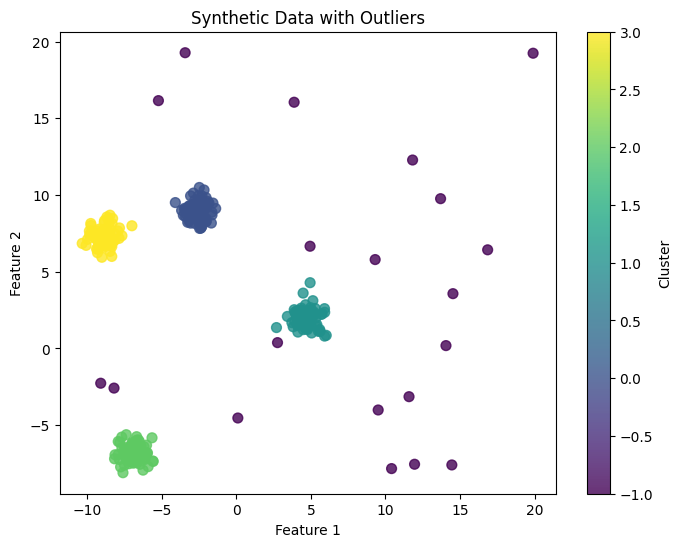

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate the main dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Generate outliers
n_outliers = 20  # Number of outliers to add
outliers = np.random.uniform(low=-10, high=20, size=(n_outliers, 2))  # Random points far from the clusters

# Combine the main dataset and outliers
X_with_outliers = np.vstack([X, outliers])
y_with_outliers = np.hstack([y, np.full(n_outliers, -1)])  # Assign -1 as the label for outliers

# Print the data
print("Main data (X):\n", X_with_outliers)
print("Labels (y):\n", y_with_outliers)

# Step 3: Visualize the data with outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=y_with_outliers, cmap='viridis', s=50, alpha=0.8)
plt.title("Synthetic Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

---

## 2. Find the Optimal K using the Elbow Method
- Generate synthetic data using `make_blobs()`.
- Run K-Means for different values of K (e.g., 2 to 10).
- Plot the inertia (sum of squared distances) vs. K to determine the optimal number of clusters.

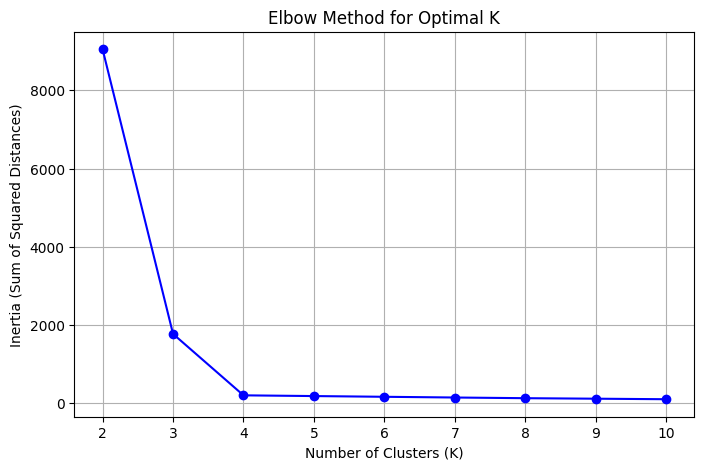

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Run K-Means for different values of K (2 to 10)
inertia_values = []
k_values = range(2, 11)  # K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  # Store inertia for each K

# Step 3: Plot the inertia vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

---
## 3. Evaluate Clustering with Silhouette Score
- Perform K-Means clustering on the Iris dataset.
- Calculate and interpret the Silhouette Score.

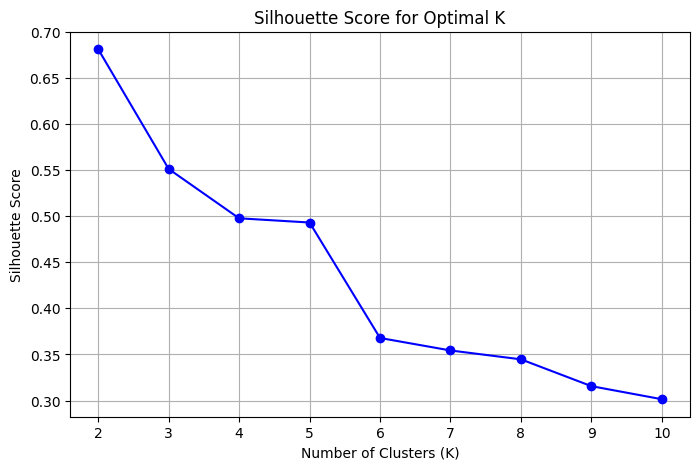

Optimal number of clusters (K) based on Silhouette Score: 2


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels (for comparison only, not used in clustering)

# Step 2: Perform K-Means clustering for different K values
silhouette_scores = []
k_values = range(2, 11)  # K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 3: Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Step 4: Interpret the results
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K) based on Silhouette Score: {best_k}")

---

## 4. K-Means Clustering on Mall Customers Dataset
- Load the Mall Customers dataset (available on Kaggle).
- Perform K-Means clustering to segment customers based on Annual Income and Spending Score.
- Visualize the clusters.


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   49                  22                      12   
1           2  Female   56                  41                      25   
2           3    Male   66                  41                      52   
3           4    Male   69                  35                      85   
4           5    Male   49                  44                      53   

  Occupation Education Level Marital Status  Number of Children  \
0     Artist             PhD       Divorced                   2   
1     Doctor          Master       Divorced                   2   
2     Doctor        Bachelor       Divorced                   4   
3     Doctor        Bachelor        Widowed                   0   
4    Student     High School        Widowed                   4   

   Membership Duration (years)  
0                            5  
1                            8  
2                            7  
3                   

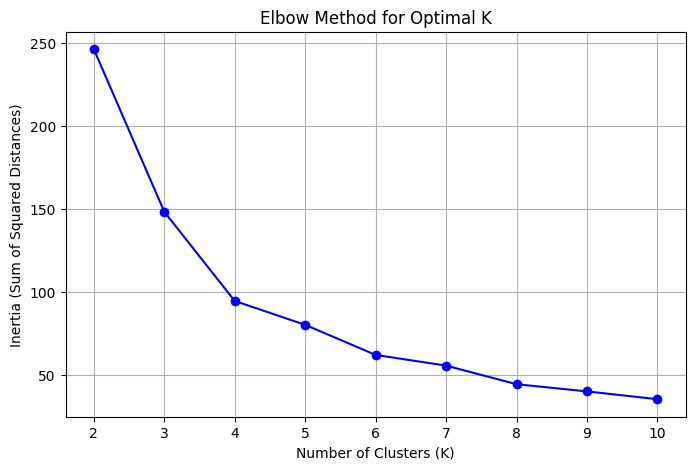

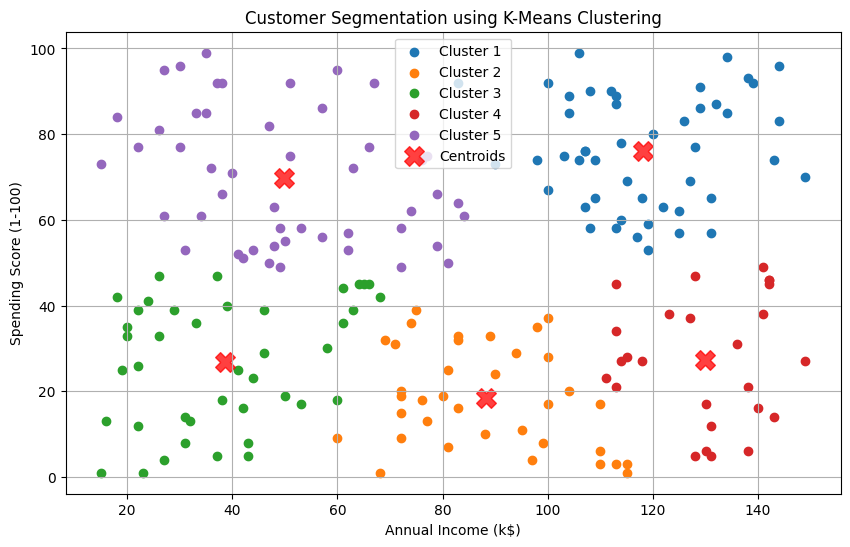

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Mall Customers dataset
# Download the dataset from Kaggle and load it into a DataFrame
# Make sure the file is in the same directory as your script or provide the full path.
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows of the dataset
print(df.head())

# Step 2: Select features for clustering
# Use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Standardize the data (optional but recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_values = range(2, 11)  # K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Step 5: Perform K-Means clustering with the optimal K
# Based on the Elbow Method, choose the optimal K (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_  # Add cluster labels to the DataFrame

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster + 1}')

# Plot the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Unscale the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("Customer Segmentation using K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

---
## 5. Clustering on Titanic Dataset
- Load the Titanic dataset.
- Convert categorical data into numerical features.
- Apply K-Means clustering to group passengers.
- Analyze which clusters had more survivors.


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


C:\Users\Admin\AppData\Local\Temp\ipykernel_10072\2374340527.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
C:\Users\Admin\AppData\Local\Temp\ipykernel_10072\2374340527.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

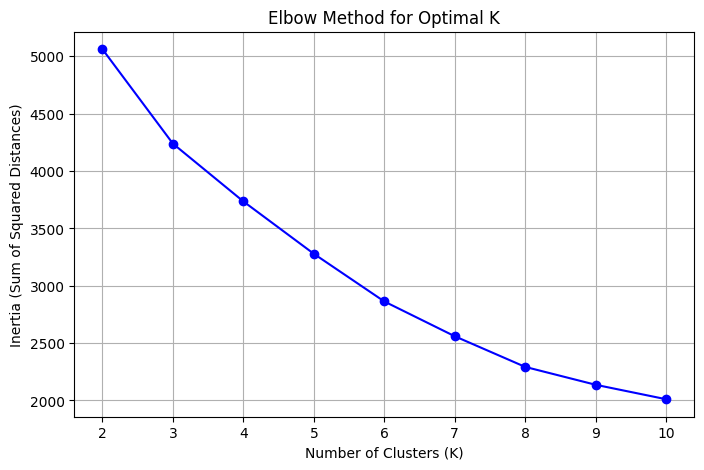

   Cluster  Survived
0        0  0.121655
1        1  0.630841
2        2  0.590226


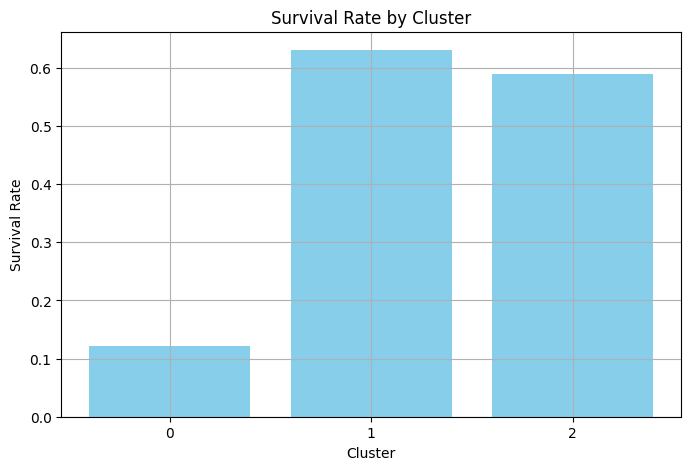

           Pclass       Sex        Age     SibSp     Parch       Fare  \
Cluster                                                                 
0        2.756691  0.995134  29.628759  0.180049  0.055961  12.018205   
1        1.032710  0.560748  38.025327  0.420561  0.317757  83.227454   
2        2.642857  0.180451  21.978684  1.135338  0.936090  22.345083   

         Embarked  Survived  
Cluster                      
0        1.673966  0.121655  
1        1.186916  0.630841  
2        1.605263  0.590226  


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the Titanic dataset
# Replace 'titanic.csv' with the actual path to your dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(df.head())

# Step 2: Preprocess the data
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing Fare with median

# Convert categorical features into numerical features
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Convert Embarked to numerical

# Select relevant features for clustering
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering
# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_values = range(2, 11)  # K from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose the optimal K (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_  # Add cluster labels to the DataFrame

# Step 4: Analyze which clusters had more survivors
# Group by cluster and calculate survival rate
cluster_survival = df.groupby('Cluster')['Survived'].mean().reset_index()
print(cluster_survival)

# Visualize survival rates by cluster
plt.figure(figsize=(8, 5))
plt.bar(cluster_survival['Cluster'], cluster_survival['Survived'], color='skyblue')
plt.title("Survival Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Survival Rate")
plt.xticks(cluster_survival['Cluster'])
plt.grid(True)
plt.show()

# Step 5: Analyze cluster characteristics
# Group by cluster and calculate mean values of features
cluster_analysis = df.groupby('Cluster')[features + ['Survived']].mean()
print(cluster_analysis)